# Exploratory Data Analysis

## Bar Plot of Experience Levels.

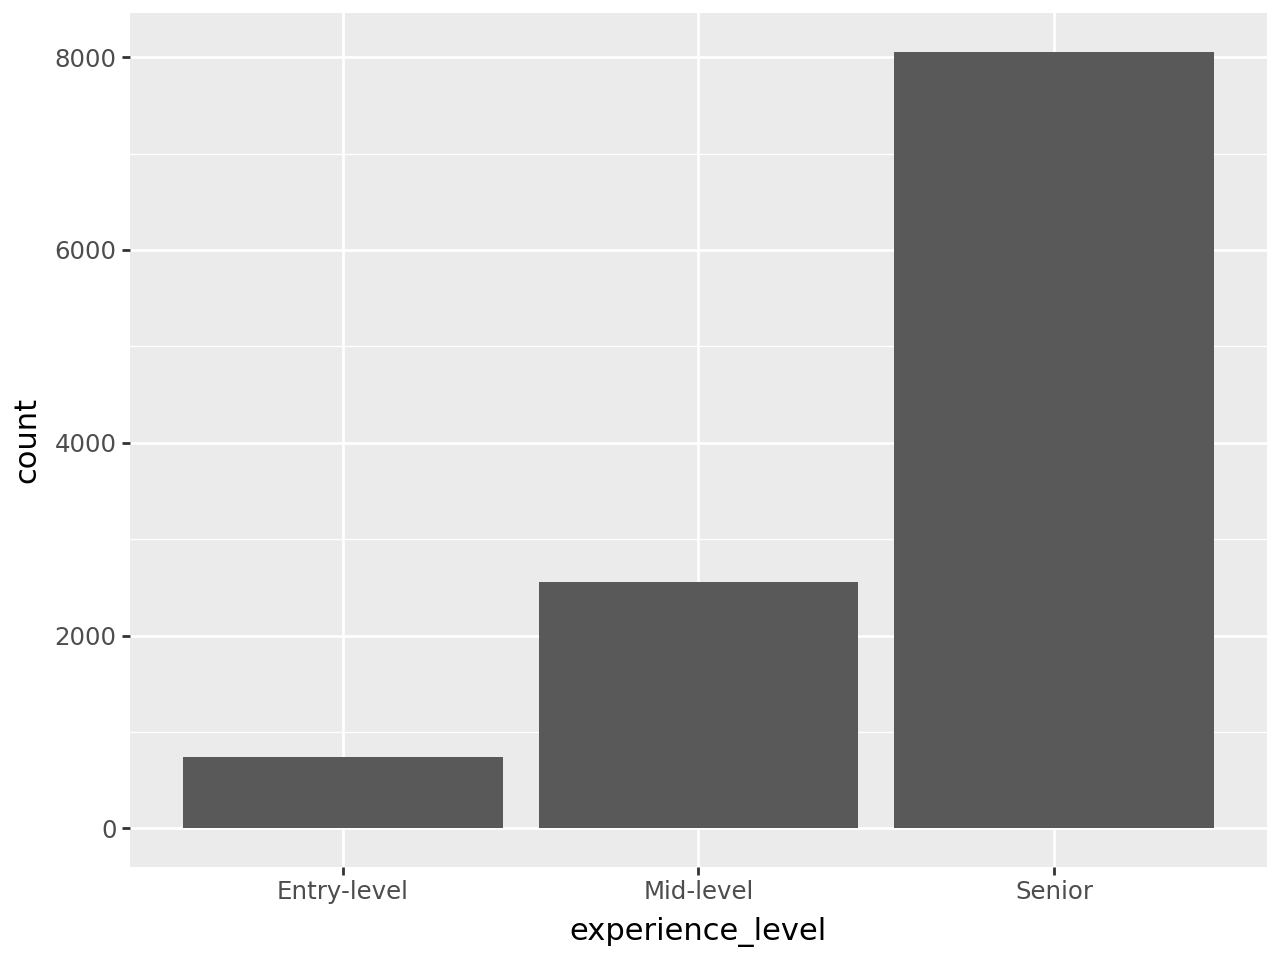

In [12]:
!pip install plotnine
from plotnine import ggplot, aes, geom_bar
ggplot(data=df) + geom_bar(mapping=aes(x='experience_level'))

## Pairwise Plots of All Variables against 'salary_in_usd'.

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
C:\Users\taman\AppData\Local\Temp\ipykernel_1636\3302081654.py:3: UserWarning: The figure layout has changed to tight


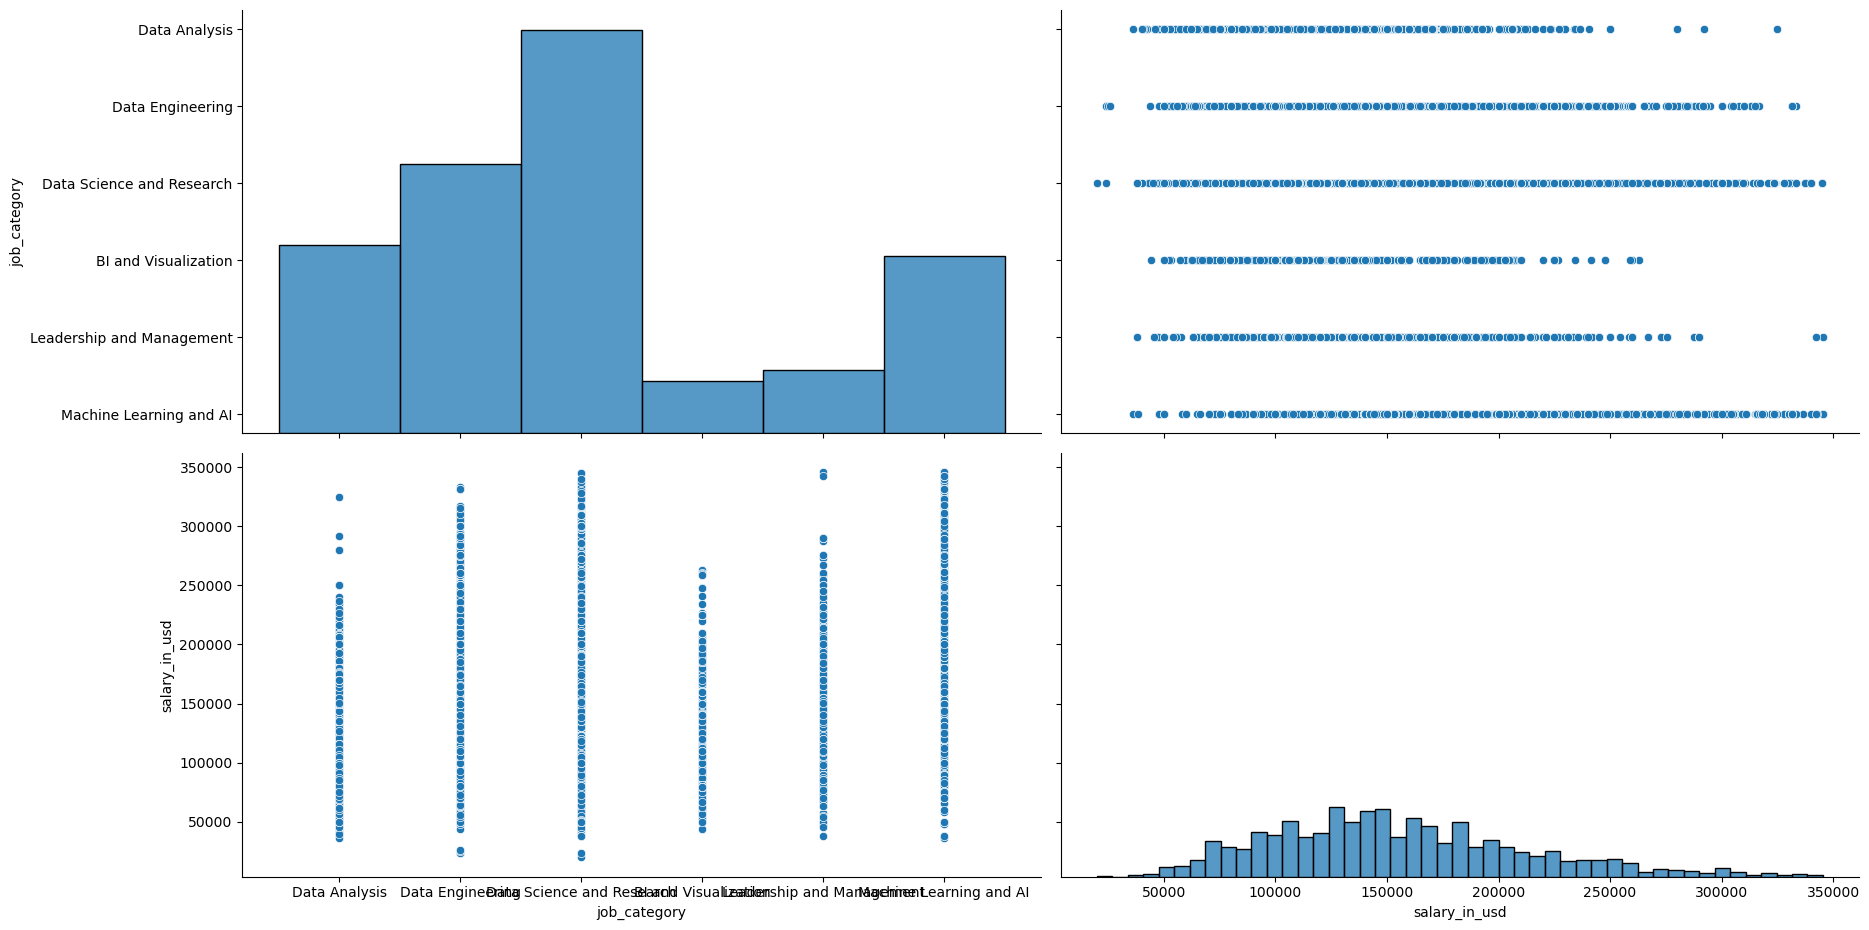

In [22]:
columns_to_add = ['job_category', 'salary_in_usd']
pairplot = sb.pairplot(data=df, vars=columns_to_add, height=4.7, aspect=2)
pairplot.fig.tight_layout()  # Adjust layout to fit elements

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


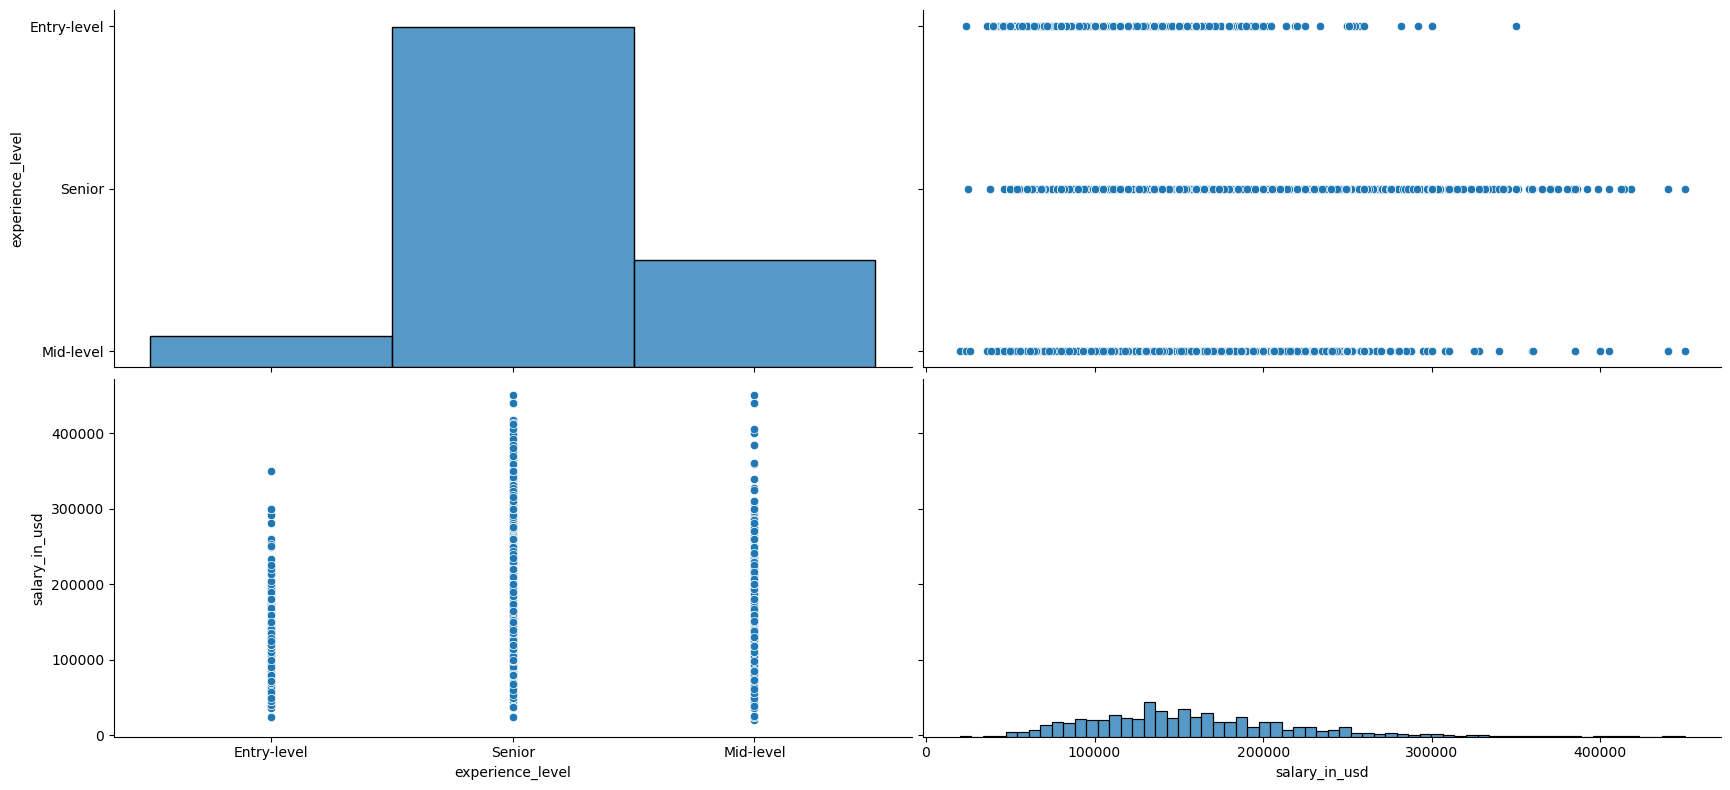

In [147]:
columns_to_add = ['experience_level', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 2.2)

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


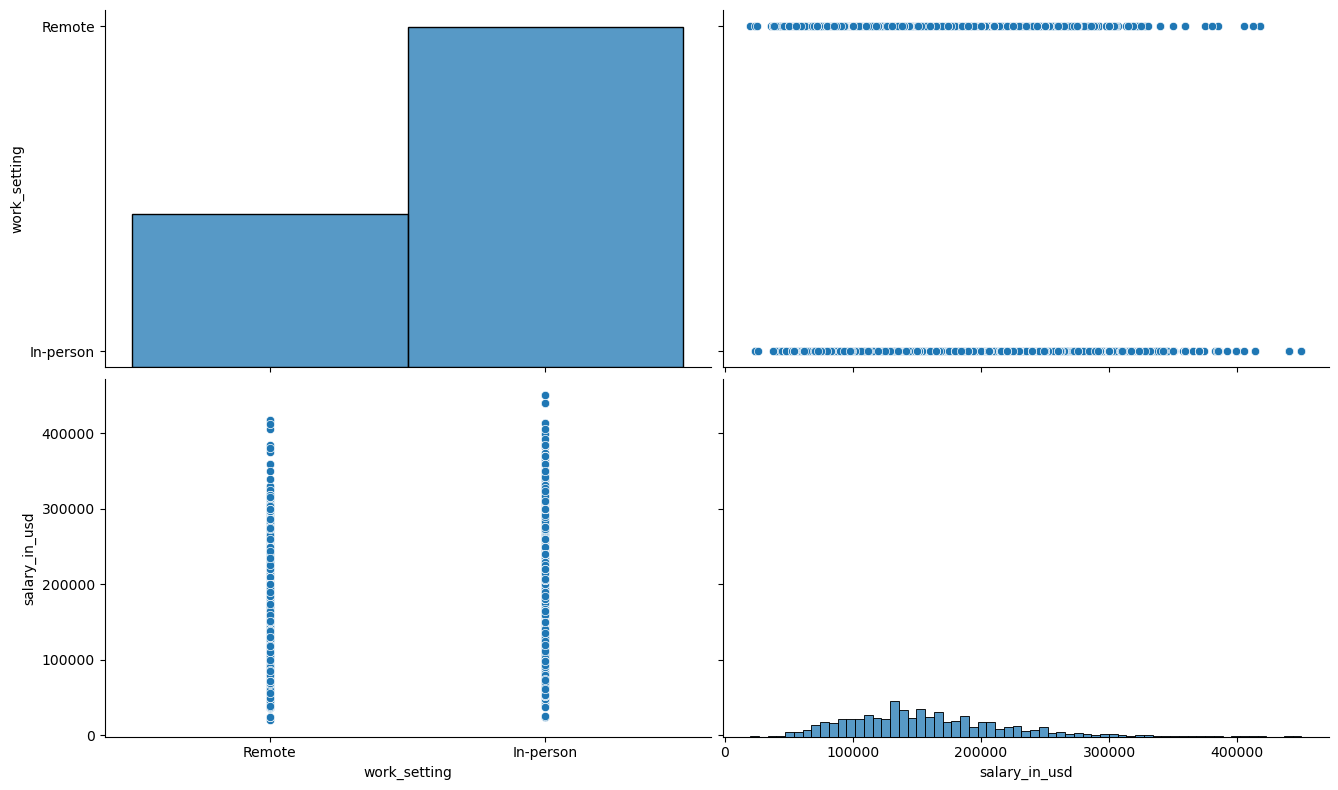

In [148]:
columns_to_add = ['work_setting', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 1.7)

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


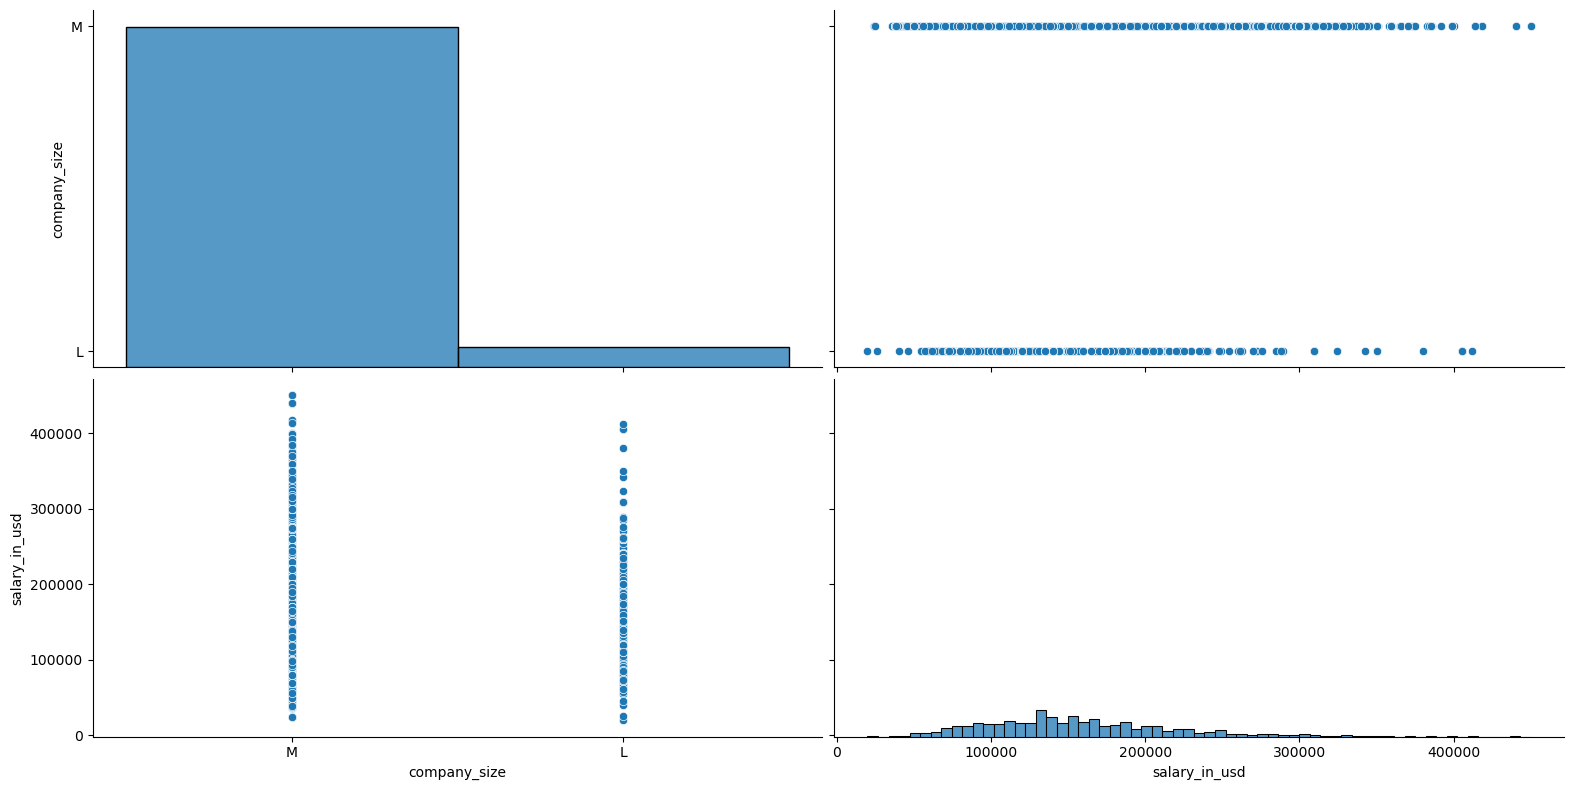

In [151]:
columns_to_add = ['company_size', 'salary_in_usd']
sb.pairplot(data = df, vars = columns_to_add, height = 4, aspect = 2)

## Now, we will make 'salary_in_usd' into a categorical data with 4 levels.

In [23]:
### Defining variables
low = df['salary_in_usd'].quantile(0.20) ##Q1
medium_low = df['salary_in_usd'].quantile(0.50)
medium_high = df['salary_in_usd'].quantile(0.80)

### Setting categories
def get_salary_category(salary_in_usd):
    if salary_in_usd <= low:
        return 'Low'
    if low < salary_in_usd <= medium_low:
        return 'Medium Low'
    if medium_low < salary_in_usd <= medium_high:
        return 'Medium High'
    if salary_in_usd > medium_high:
        return 'High'

df['salary_category'] = df['salary_in_usd'].apply(get_salary_category)
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category,salary_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis,Low
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis,Low
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering,High
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering,Medium High
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research,High


## We plot a catplot to check the count of people under each category of salary.

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


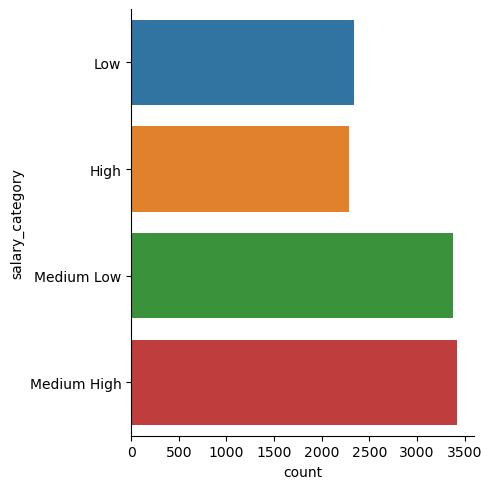

In [154]:
sb.catplot(y= 'salary_category', data = df, kind = "count")

In [155]:
percentage_split = (df['salary_category'].value_counts() / len(df['salary_category'])) * 100
print (percentage_split)

salary_category
Medium High    29.965004
Medium Low     29.580052
Low            20.481190
High           19.973753
Name: count, dtype: float64


### From the plot above, it can be seen that there are roughly 10% more people with medium high and medium low salaries as compared to high and low salaries, which is logical since the general population should be earning around medium salary unless he is very high in rank in his job.

## Next, we plot the boxplot for experience level against salary.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

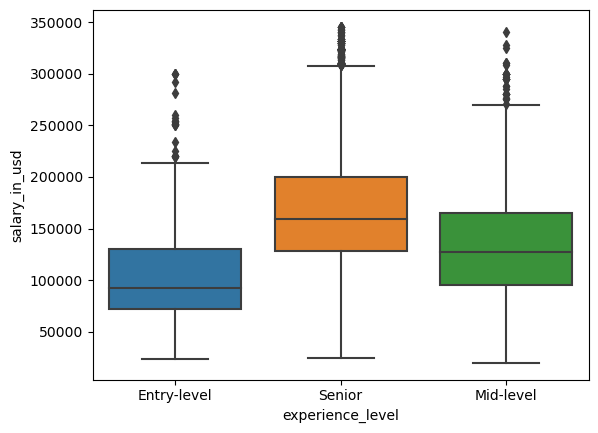

In [87]:
df = df[df['experience_level'].isin(['Entry-level','Mid-level','Senior'])] 
sb.boxplot(x='experience_level',y ='salary_in_usd', data = df)

### From the box plot above, it can be seen the experience level 'senior' has the highest median salary_in_usd, followed by mid-level and then the lowest being those in the 'entry-level', which is also logical since salary typically increases as your experience level increases. 50% of 'Senior' data has salary from around 130000 usd to 200000 usd whereas 50% of 'Entry-level' data has salary around 70000 usd to 130000 usd and 50% of 'Mid-Level' data has salary areound 100000 usd to 170000 usd. The range of data for 'Senior' is also the largest, followed by 'Mid-level' and lastly 'Entry-level'.

## Now, we plot the box plot of work_setting against salary.

<Axes: xlabel='work_setting', ylabel='salary_in_usd'>

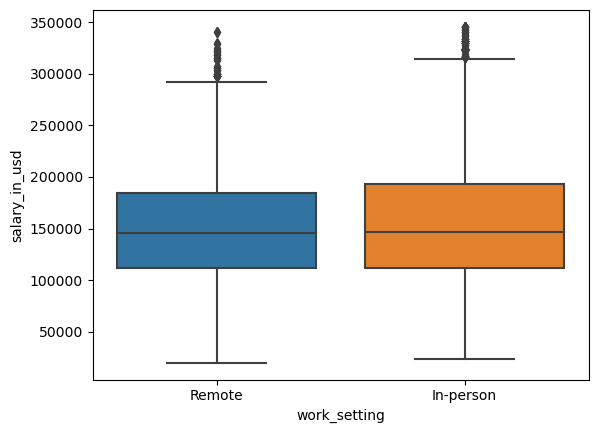

In [18]:
df = df[df['work_setting'].isin(['Remote','In-person'])] 
sb.boxplot(x='work_setting',y ='salary_in_usd', data = df)

### For work_setting, the median salary_in_usd is approximately the same with Q3 of in-person being slightly higher than remote work setting. The range of 'In-person' salary is also slightly higher than 'Remote' which could be due to having to travel to and fro the person's office and home. 

## Now, the box plot for company_size against salary. 

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

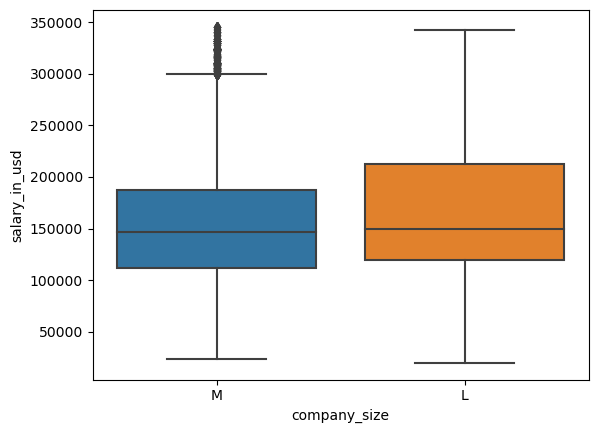

In [19]:
df = df[df['company_size'].isin(['M','L'])] 
sb.boxplot(x='company_size',y ='salary_in_usd', data = df)

### For company_size, the median salary_in_usd is also approximately the same but with Q3 of L(Large) companies being higher than M(Medium) companies. Additionally, the spread of salary for L companies is also more than that of M companies because L companies are more likely to have the financial resources to afford higher salaries for their employees and also, might have more higher-ranking positions than M companies. However, M companies have quite a lot of outliers whereas L companies has none. This might be because some minority of M companies might be doing better and can thus afford higher salaries for their employees, which is quite rare. One possible reason why L companies do not have outliers might be because across large companies, the salary payout is quite standard so there isn't particular circumstances where the salary will be very high or low.

## Now, the box plot for job_category against salary.

<Axes: xlabel='job_category', ylabel='salary_in_usd'>

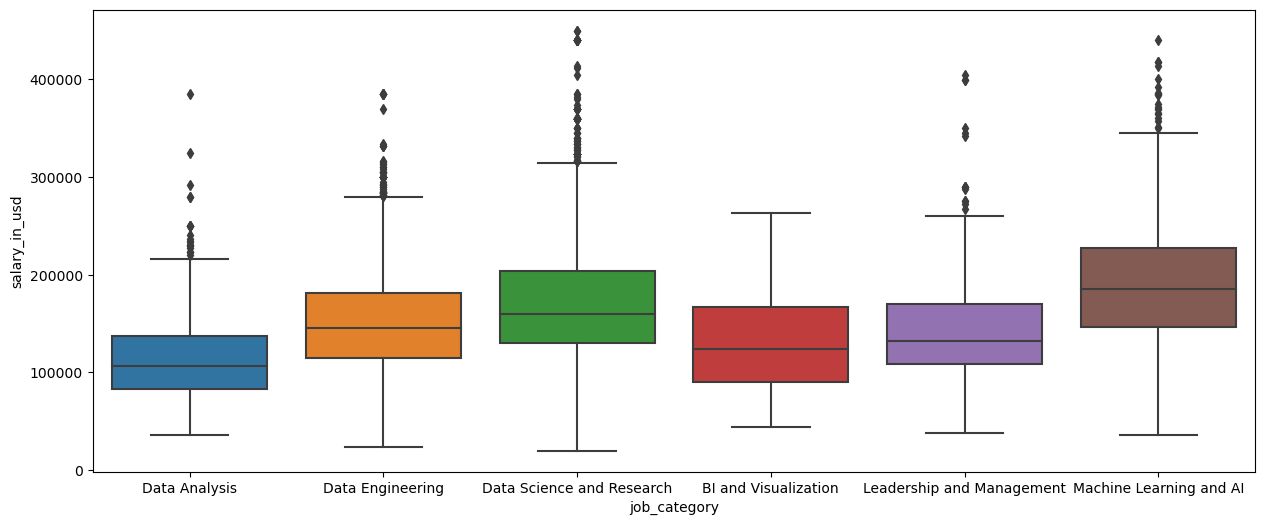

In [156]:
df = df[df['job_category'].isin(['BI and Visualization','Data Analysis', 'Data Engineering','Data Science and Research','Leadership and Management','Machine Learning and AI'])] 
plt.figure(figsize=(15, 6))
sb.boxplot(x='job_category',y ='salary_in_usd', data = df)

### Across the different job categories, Machine Learning and AI has the highest median salary whereas Data Analysis has the lowest median salary. This might be due to the rising attention on AI and integrating machines into our life, thus demanding more employees in that aspect and thus, higher salaries paid. The spread of salaries under Machine Learning and AI is also the highest, which means that those who might be in the 'Entry-Level' might be earning significantly less than those who are already inthe 'Senior' category. There are outliers for the Data Analysis, Data Engineering, Data Science and Research and Leadership and Management categories which could be because they are at extremely high positions in their jobs or it might be because their companies are doing extremely well.

## Now, the box plot for job_title against salary.

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

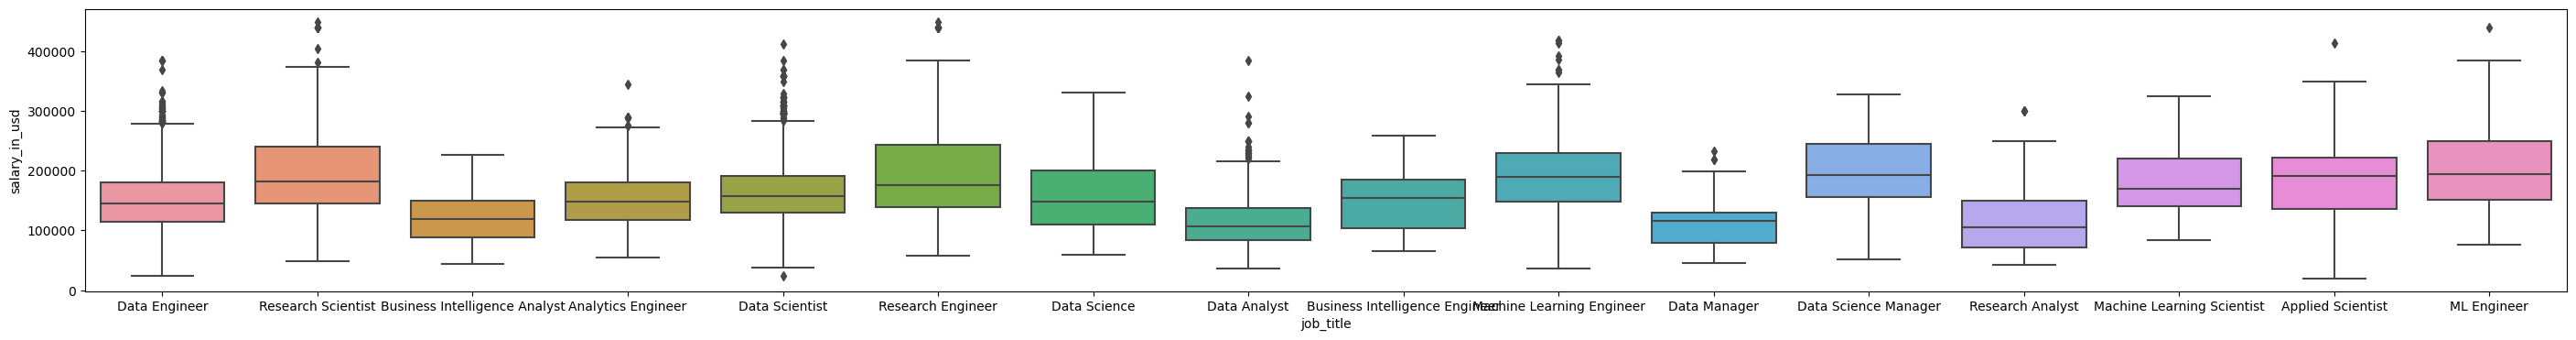

In [157]:
df = df[df['job_title'].isin(['Analytics Engineer','Applied Scientist','Business Intelligence Engineer','Business Intelligence Analyst','Data Analyst','Data Architect','Data Engineer','Data Manager','Data Science','Data Science Manager','Data Scientist','Machine Learning Engineer','Machine Learning Scientist','ML Engineer','Research Analyst','Research Engineer','Research Scientist',''])] 
plt.figure(figsize=(35, 4))
sb.boxplot(x='job_title',y ='salary_in_usd', data = df)

### The highest median salary is approximately shared between Research Scientist(Data Science and research), Machine Learning Engineer(Machine Learning and AI), Data Science Manager(Data Science and Research), Applied Scientist(Data Science and Research) and ML Engineer(Machine Learning and AI). Hence, we can infer that the job categories of Data Science and Research and Machine Learning has more higher-paying job titles than the other categories. This delves deeper into the salaries of specific job titles under the job categories so that if a person is looking for a high-paying specific job under either of these 2 job categories, Data Science and Research and Machine Learning and AI, he will know what to choose.¶

## Now, we will convert the categorical data into numerical data that can be used for analysis. 

In [24]:
df_duplicate = df.copy()

In [27]:
df_duplicate['experience_level'] = df_duplicate['experience_level'].replace(['Entry-level', 'Mid-level', 'Senior'], [0, 1, 2])
df_duplicate['work_setting'] = df_duplicate['work_setting'].replace(['Remote', 'In-person'], [0, 1])
df_duplicate['company_size'] = df_duplicate['company_size'].replace(['M', 'L'], [0, 1])
df_duplicate['job_category'] = df_duplicate['job_category'].replace(['Data Analysis', 'Data Engineering', 'Data Science and Research', 'BI and Visualization', 'Leadership and Management', 'Machine Learning and AI'], [0, 1, 2, 3, 4, 5])
df_duplicate['salary_category'] = df_duplicate['salary_category'].replace(['Low', 'Medium Low', 'Medium High', 'High'], [0, 1, 2, 3])

In [28]:
new_df = df_duplicate[['experience_level', 'work_setting', 'company_size', 'job_category', 'salary_category']].copy()
new_df

,experience_level,work_setting,company_size,job_category,salary_category
7,0,0,0,0,0
8,0,0,0,0,0
9,2,1,0,1,3
10,2,1,0,1,2
11,2,1,0,2,3
...,...,...,...,...,...
14185,2,0,0,2,2
14186,1,0,0,2,1
14187,1,0,0,2,1
14188,1,0,0,1,1


## Performing Cramer's V Test to find correlation between each categorical variable with salary.

In [29]:
### Cramer's V
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Loop through each categorical variable
for column in new_df.columns[:-1]:  # Exclude the target variable 'salary_category'
    confusion_matrix = pd.crosstab(new_df['salary_category'], new_df[column])
    if confusion_matrix.values.size == 0:
        print(f"No data for '{column}'. Skipping calculation of Cramér's V.")
    else:
        v = cramers_v(confusion_matrix)
        print(f"Cramér's V between 'salary_category' and '{column}': {v}")

Cramér's V between 'salary_category' and 'experience_level': 0.2536934876376228
Cramér's V between 'salary_category' and 'work_setting': 0.08818612504174299
Cramér's V between 'salary_category' and 'company_size': 0.07920845313704636
Cramér's V between 'salary_category' and 'job_category': 0.2468278606178054


## Finding top variable based on Chi-square scores to determine its importance in determining result of the target variable 'salary_category'.

In [30]:
#We use Chi2score>100 and k=38

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k = min(38, new_df.shape[1] - 1)
category_rank_feature = SelectKBest(score_func=chi2, k=k)
features = new_df.drop(columns=['salary_category'])
target = new_df['salary_category']
rank_feature = category_rank_feature.fit(features, target)
print(rank_feature.scores_)

[ 313.58331617   28.46326774   70.02626807 1234.91019436]


## Finding the ranking of variables in ascending order. 

In [31]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(new_df.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)
sorted_univariate_cat_rank

,Score
Feature,
job_category,1234.910194
experience_level,313.583316
company_size,70.026268
work_setting,28.463268
salary_category,NaN


## Splitting dataset into train and test data.

In [32]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = new_df.drop(columns=['salary_category'])  # Features
y = new_df['salary_category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9079, 4)
Shape of X_test: (2270, 4)
Shape of y_train: (9079,)
Shape of y_test: (2270,)
